In [3]:
# Dependencies
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
df = pd.read_csv("./Scale up data.csv")

In [5]:
# Splitting the data into input and output
from sklearn.model_selection import train_test_split

# For now keeping the degradation efficiency as the output
X = df.drop(['Degradation'], axis=1)
y = df['Degradation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)

In [6]:
nn = tf.keras.models.load_model("./scale up 1.09 topend")

In [7]:
# Contour all values
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
volume = np.array([1, 1.5, 2, 2.5, 3])
density = np.array([1,1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])


# Contour inputs
# hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
# volume = np.array([1, 2, 3])
# density = np.array([2,4,6,8,10])

## Surface plot

72/72 [==============================] - 0s 1ms/step


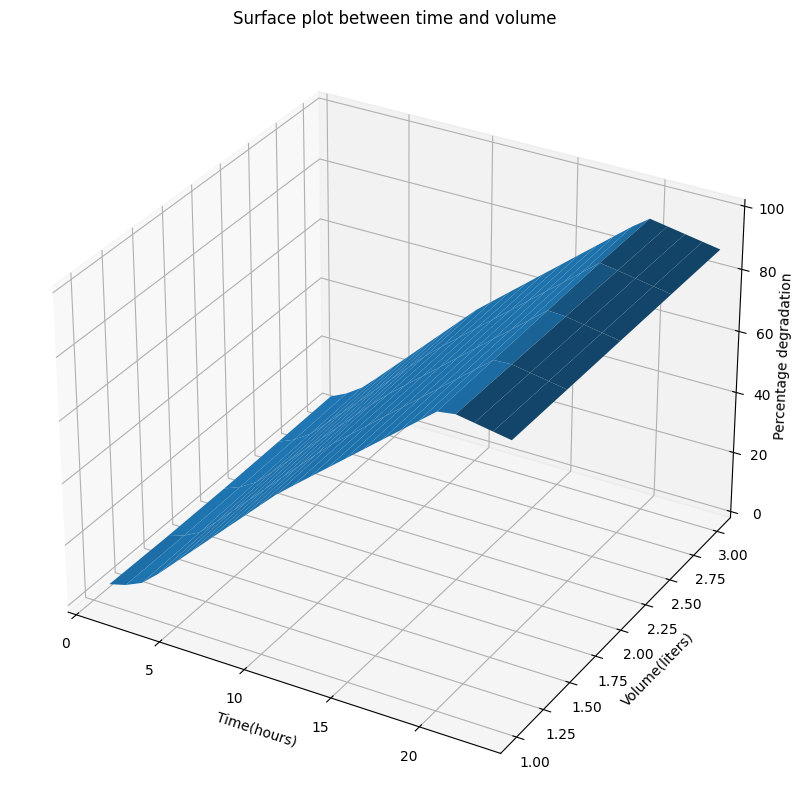

In [8]:
# Hours - Volume
hours_grid, volume_grid, density_grid  = np.meshgrid( hours, volume, density)

# Reshape to 1D array
hours_flat = hours_grid.ravel()
volume_flat = volume_grid.ravel()
density_flat = density_grid.ravel()

# Combine the arrays into a 2D NumPy array
input = np.vstack((hours_flat, volume_flat, density_flat)).T

output = nn.predict(input)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection="3d")

output_reshaped = output.reshape(hours_grid.shape)

surf = ax.plot_surface(hours_grid[:,:,15], volume_grid[:,:,15], output_reshaped[:,:,15])

ax.set_title('Surface plot between time and volume')
ax.set_xlabel('Time(hours)')
ax.set_ylabel('Volume(liters)')
ax.set_zlabel('Percentage degradation', labelpad=-0.5)
ax.set_zlim(0, 100)
ax.set_xlim(0, 24)
plt.show()

72/72 [==============================] - 0s 1ms/step


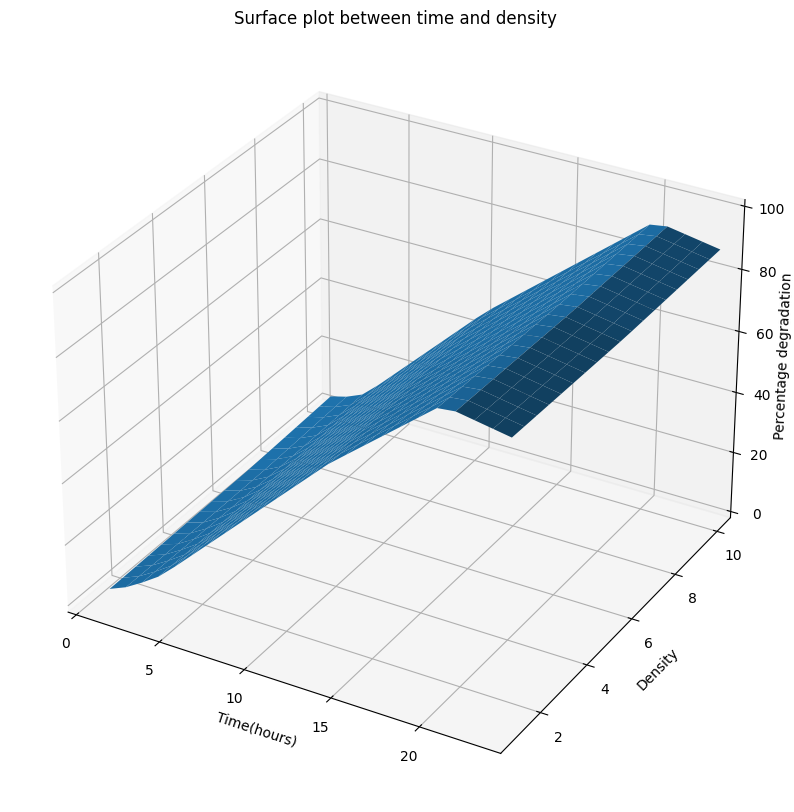

In [9]:
# Hours - Density
hours_grid, density_grid, volume_grid,  = np.meshgrid( hours, density, volume )

# Reshape to 1D array
hours_flat = hours_grid.ravel()
volume_flat = volume_grid.ravel()
density_flat = density_grid.ravel()

# Combine the arrays into a 2D NumPy array
input = np.vstack((hours_flat, volume_flat, density_flat)).T

output = nn.predict(input)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection="3d")

# Reshape the output to match the shape of the grid
output_reshaped = output.reshape(density_grid.shape)

ax.plot_surface(hours_grid[:,:,0], density_grid[:,:,0], output_reshaped[:,:,0])

ax.set_title('Surface plot between time and density')
ax.set_xlabel('Time(hours)')
ax.set_ylabel('Density')
ax.set_zlabel('Percentage degradation', labelpad=-0.5)
ax.set_xlim(0, 24)
ax.set_zlim(0, 100)

plt.show()

72/72 [==============================] - 0s 1ms/step


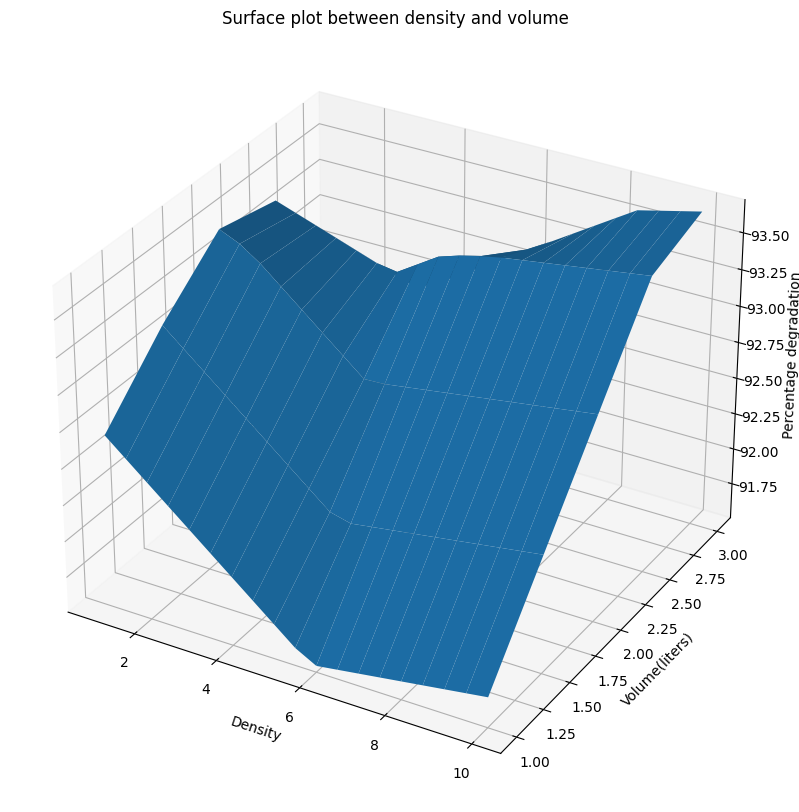

In [10]:
# Density - Volume

density_grid, volume_grid,hours_grid  = np.meshgrid(density, volume, hours)
# Reshape to 1D array
hours_flat = hours_grid.ravel()
volume_flat = volume_grid.ravel()
density_flat = density_grid.ravel()

# Combine the arrays into a 2D NumPy array
input = np.vstack((hours_flat, volume_flat, density_flat)).T

output = nn.predict(input)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection="3d")

# Reshape the output to match the shape of the grid
output_reshaped = output.reshape(density_grid.shape)

ax.plot_surface(density_grid[:,:,19], volume_grid[:,:,19], output_reshaped[:,:,19])

ax.set_title('Surface plot between density and volume')
ax.set_xlabel('Density')
ax.set_ylabel('Volume(liters)')
ax.set_zlabel('Percentage degradation', labelpad=3.7)

plt.show()

## Contour plot

72/72 [==============================] - 0s 1ms/step


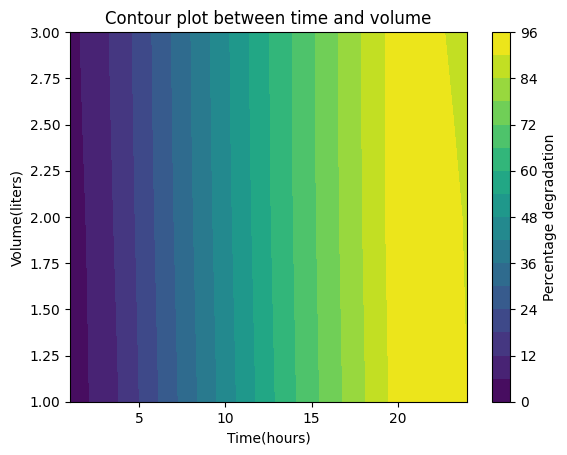

In [11]:
# Hours - Volume
hours_grid, volume_grid, density_grid  = np.meshgrid( hours, volume, density)

# Reshape to 1D array
hours_flat = hours_grid.ravel()
volume_flat = volume_grid.ravel()
density_flat = density_grid.ravel()

# Combine the arrays into a 2D NumPy array
input = np.vstack((hours_flat, volume_flat, density_flat)).T

output = nn.predict(input)

fig, ax = plt.subplots(1, 1)

# Reshape the output to match the shape of the grid
output_reshaped = output.reshape(hours_grid.shape)

contour = ax.contourf(hours_grid[:,:,3], volume_grid[:,:,3], output_reshaped[:,:,3], levels=15, cmap="viridis")
ax.set_title('Contour plot between time and volume')
ax.set_xlabel('Time(hours)')
ax.set_ylabel('Volume(liters)')

# Add colorbar
cbar = fig.colorbar(contour, ax=ax)
cbar.set_label('Percentage degradation')
plt.show()

72/72 [==============================] - 0s 1ms/step


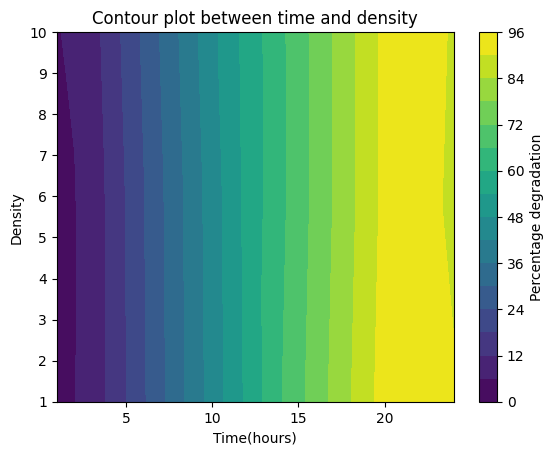

In [12]:
# Hours and density
fig, ax = plt.subplots(1, 1)

hours_grid,  density_grid, volume_grid  = np.meshgrid(hours, density, volume)

# Reshape to 1D array
hours_flat = hours_grid.ravel()
volume_flat = volume_grid.ravel()
density_flat = density_grid.ravel()

# Combine the arrays into a 2D NumPy array
input = np.vstack((hours_flat, volume_flat, density_flat)).T

output = nn.predict(input)


# Reshape the output to match the shape of the grid
output_reshaped = output.reshape(hours_grid.shape)

contour = ax.contourf(hours_grid[:,:,0], density_grid[:,:,0], output_reshaped[:,:,0], levels=15)
ax.set_title('Contour plot between time and density')
ax.set_xlabel('Time(hours)')
ax.set_ylabel('Density')

# Add colorbar
cbar = fig.colorbar(contour, ax=ax)
cbar.set_label('Percentage degradation')

plt.show()

72/72 [==============================] - 0s 1ms/step


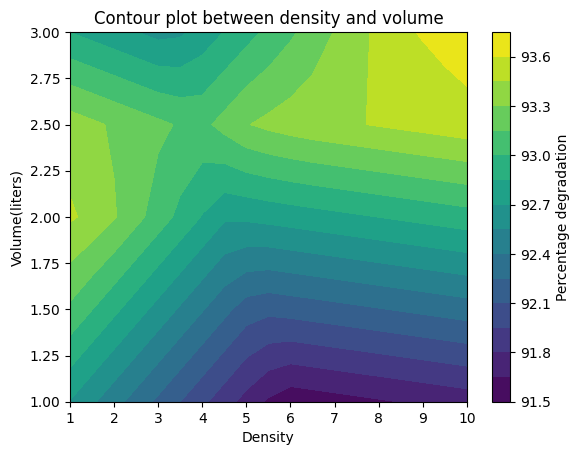

In [13]:
fig, ax = plt.subplots(1, 1)

density_grid, volume_grid, hours_grid  = np.meshgrid(density, volume, hours)
# Reshape to 1D array
hours_flat = hours_grid.ravel()
volume_flat = volume_grid.ravel()
density_flat = density_grid.ravel()

# Combine the arrays into a 2D NumPy array
input = np.vstack((hours_flat, volume_flat, density_flat)).T

output = nn.predict(input)

# Reshape the output to match the shape of the grid
output_reshaped = output.reshape(hours_grid.shape)

contour = ax.contourf(density_grid[:,:,19], volume_grid[:,:,19], output_reshaped[:,:,19], levels=20)
ax.set_title('Contour plot between density and volume')
ax.set_xlabel('Density')
ax.set_ylabel('Volume(liters)')

# Add colorbar
cbar = fig.colorbar(contour, ax=ax)
cbar.set_label('Percentage degradation')

plt.show()